### Computer Vision HW 11
**Name :** Arka Sarkar <br>
**Roll Number :** 2018222


In [110]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

(256, 256, 3)


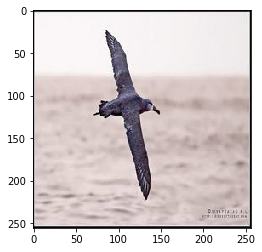

In [111]:
image  = cv2.imread('Black_Footed_Albatross_0009_34.jpg')
plt.imshow(image)
print(image.shape)

(256, 256)


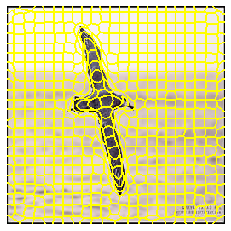

In [112]:
segments = slic(image, n_segments = 500, sigma = 5)
fig = plt.figure("Superpixels -- %d segments" % (500))
print(segments.shape)
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

plt.show()

In [113]:
def get_super_image(image, segments):
    
    m,n = segments.shape
    
    dict_ = {}
    centers = {}

    for i in range(m):
        for j in range(n):
            if(segments[i,j] not in dict_):
                dict_[segments[i,j]] = []
                centers[segments[i,j]] = []
                dict_[segments[i,j]].append(image[i,j])
                centers[segments[i,j]].append(np.array([i,j]))
            else :
                dict_[segments[i,j]].append(image[i,j])
                centers[segments[i,j]].append(np.array([i,j]))
    for key in list(dict_.keys()):
        dict_[key] = np.mean(np.array(dict_[key]), 0).astype(int)
        centers[key] = np.mean(np.array(centers[key]), 0).astype(int)
            
    
    diag = 0
    for i in centers:
        for j in centers:
            diag = max(diag, np.linalg.norm(centers[i] - centers[j]))
            
            
    salient_image = np.zeros((image.shape[0],image.shape[1]))
    saliency = {}
    for i in dict_:
        val = 0
        for j in dict_:
            val+= np.linalg.norm(dict_[i] - dict_[j])*np.exp(-(np.linalg.norm(centers[i] - centers[j])/diag))
        saliency[i] = val
    
    for i in range(m):
        for j in range(n):
            salient_image[i,j] = saliency[segments[i,j]]
            
    plt.imshow(salient_image)
    plt.title("Salient Image")
        

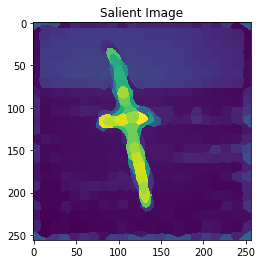

In [114]:
get_super_image(image, segments)